# Implementing RandomSearchCV with k fold cross validation on KNN


In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.utils import resample


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

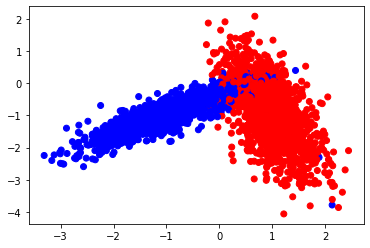

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = ['red','blue']
plt.scatter(X_test[:,0], X_test[:,1],c=y_test,cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

In [3]:
# it will take classifier and range of values as params which will be mentioned as tuple
# we are implementing this only for KNN, the hyper parameter should n_neighbors

def RandomSearch(x_train,y_train,classifier, params, folds):
    
    #using resample to uniformly select 10 number from given range and sorting it
    params = sorted(resample(range(params[0],params[-1]),replace=False, n_samples=10)) 
    
    trainscores = []
    testscores  = []
    
    for k in params:
        trainscores_folds = []
        testscores_folds  = []
        m=int(len(x_train)/folds)
        previous=0
        for j in range(1,folds+1):
            if j == folds:
                test_indices = range(previous,len(x_train))
            else:
                test_indices = range(previous, (j*m)+1)
                
            train_indices  = list(set(list(range(1, len(x_train)))) - set(test_indices))
            previous = j*m
            
            
         # selecting the data points based on the train_indices and test_indices
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]
            
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores,params   

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

params = (1,30)

folds = 3

trainscores,testscores ,params= RandomSearch(X_train, y_train, neigh, params, folds) #calling the created function

print('params =',params,'\n')

print('Train Scores')
print(trainscores,'\n') 

print('Test Scores')
print(testscores)


params = [1, 2, 7, 8, 9, 12, 15, 18, 22, 24] 

Train Scores
[1.0, 0.9684583175138428, 0.9606560901349271, 0.9597225700975862, 0.9598559434442576, 0.9582555433322225, 0.9581221166202027, 0.958122156644214, 0.9575219832548609, 0.9569885032095122] 

Test Scores
[0.9302855391176862, 0.9410822337731574, 0.952812475009996, 0.9529456484073037, 0.954012261761962, 0.9556119952019192, 0.95467887511662, 0.9542789284286286, 0.9553452219112355, 0.9561449553511929]


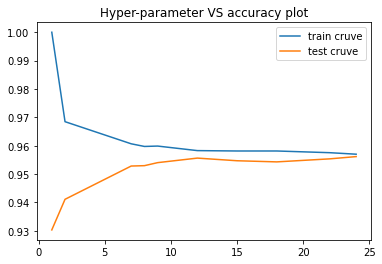

In [5]:
#Plotting elbow method

plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()

***Observation***
1. From the above elbow curve of train and test scores we can able to see less difference when params is 24
2. We can choose our parameter k as 24

### Building Model

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=24) # setting k as 24
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [7]:
#fitting the model
Y_predicted = knn.predict(X_train)

#computing train score
accuracy_score(y_train, Y_predicted)

0.9573333333333334

In [8]:
#computing test score

Y_predicted = knn.predict(X_test)
accuracy_score(y_test, Y_predicted)

0.9676

In [9]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

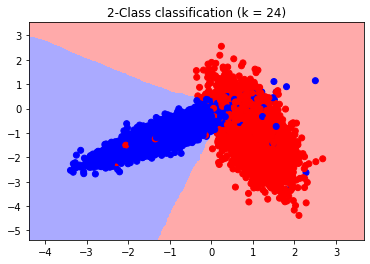

In [10]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 24)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)